### 5.2.3 릿지 회귀 모델 구현하기

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train = np.append(np.ones((n_train, 1)), X_train, axis=1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis=1)

In [2]:
alphas = [0, 0.1, 1]

for alpha in alphas:
    w = np.linalg.inv(X_train.T @ X_train + alpha *
                      np.identity(X_train.shape[1])) @ X_train.T @ y_train

    y_pred_train = X_train @ w
    print(f'alpha 값이 {alpha}일 때:')
    print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')
    y_pred = X_test @ w
    print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}\n')

alpha 값이 0일 때:
학습 데이터셋 MAE: 43.549
테스트 데이터셋 MAE: 42.618

alpha 값이 0.1일 때:
학습 데이터셋 MAE: 43.924
테스트 데이터셋 MAE: 43.368

alpha 값이 1일 때:
학습 데이터셋 MAE: 48.909
테스트 데이터셋 MAE: 49.590



### [예제 5.1] Ridge 클래스 사용하기

In [3]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [4]:
alphas = [0, 0.1, 1]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg = reg.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    print(f'alpha 값이 {alpha}일 경우:')
    print(f'학습 데이터셋 MAE:{np.abs(y_pred_train - y_train).mean(): .3f}')
    y_pred = reg.predict(X_test)
    print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}\n')

alpha 값이 0일 경우:
학습 데이터셋 MAE: 43.549
테스트 데이터셋 MAE: 42.618

alpha 값이 0.1일 경우:
학습 데이터셋 MAE: 43.928
테스트 데이터셋 MAE: 43.366

alpha 값이 1일 경우:
학습 데이터셋 MAE: 48.966
테스트 데이터셋 MAE: 49.582



### [예제 5.2] OLS와 릿지 회귀의 변동성

In [5]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
%matplotlib inline

X_train = np.array([[0.5], [1]])
y_train = np.array([0.5, 1])
X_test = np.array([[0], [2]])

Text(0, 0.5, 'y')

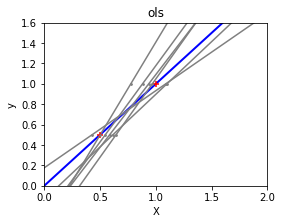

In [6]:
np.random.seed(1234)

fig, ax = plt.subplots(figsize=(4, 3))

clf = LinearRegression().fit(X_train, y_train)
ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

for _ in range(6):
    this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
    clf = LinearRegression().fit(this_X, y_train)
    ax.plot(X_test, clf.predict(X_test), color="gray")
    ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

ax.set_title('ols')
ax.set_xlim(0, 2)
ax.set_ylim((0, 1.6))
ax.set_xlabel("X")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

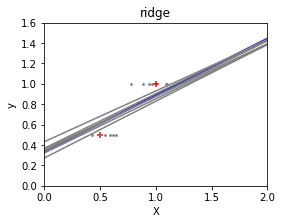

In [7]:
np.random.seed(1234)

fig, ax = plt.subplots(figsize=(4, 3))

clf = Ridge(alpha=0.1).fit(X_train, y_train)
ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

for _ in range(6):
    this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
    clf = Ridge(alpha=0.1).fit(this_X, y_train)
    ax.plot(X_test, clf.predict(X_test), color="gray")
    ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

ax.set_title('ridge')
ax.set_xlim(0, 2)
ax.set_ylim((0, 1.6))
ax.set_xlabel("X")
ax.set_ylabel("y")

### [예제 5.3] 거의 완벽한 선형 데이터에서의 OLS 모델과 릿지 회귀 모델

In [8]:
import numpy as np
import pandas as pd

n, n_train = 1000, 700
m, v = 1, 0.01

np.random.seed(1234)
X1 = np.random.normal(m, v, size=n)
X2 = np.random.normal(m, v, size=n)
X3 = np.random.normal(m, v, size=n)
X4 = np.random.normal(m, v, size=n)
y = X1*100 + X2*20 + X3*30 + X4*50 + np.random.normal(m, v, size=n)
df = pd.DataFrame({'y': y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

train, test = df.iloc[:n_train, :], df.iloc[n_train:, :]

X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]

In [9]:
from sklearn.linear_model import LinearRegression, Ridge

reg1 = LinearRegression()
y_pred = reg1.fit(X_train, y_train).predict(X_test)
print(f'OLS 모델의 MAE:{((y_pred - y_test)**2).mean(): .5f}')

OLS 모델의 MAE: 0.00011


In [10]:
for alpha in [1000, 100, 10, 1, 0.1, 0.01, 0.001]:
    reg2 = Ridge(alpha=alpha)
    y_pred = reg2.fit(X_train, y_train).predict(X_test)
    ((y_pred - y_test)**2).mean()
    print(f'alpha 값이 {alpha}일 때 릿지 회귀 모델의 MAE:{((y_pred - y_test)**2).mean(): .5f}')

alpha 값이 1000일 때 릿지 회귀 모델의 MAE: 1.44251
alpha 값이 100일 때 릿지 회귀 모델의 MAE: 1.44082
alpha 값이 10일 때 릿지 회귀 모델의 MAE: 1.42405
alpha 값이 1일 때 릿지 회귀 모델의 MAE: 1.27140
alpha 값이 0.1일 때 릿지 회귀 모델의 MAE: 0.52970
alpha 값이 0.01일 때 릿지 회귀 모델의 MAE: 0.02572
alpha 값이 0.001일 때 릿지 회귀 모델의 MAE: 0.00041


## 05 되새김 문제

### [되새김 문제 5.1] Ridge 클래스 적용하기

#### 문제

In [11]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=2345)

#### 풀이

In [12]:
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = Ridge(alpha=10, solver='sag', random_state=1234)
y_pred = reg.fit(X_train_scaled, y_train).predict(X_test_scaled)

print(f'RMSE:{np.sqrt(((y_pred - y_test)**2).mean()): .3f}')

RMSE: 56.379


### [되새김 문제 5.2] 비선형 회귀 문제에서의 선형 규제 모델

#### 문제

In [1]:
import numpy as np
import pandas as pd

n1, n2, n_train = 2500, 2500, 4000
m, v = 1, 0.1

np.random.seed(1234)
X1 = np.random.normal(m, v, size=n1)
X2 = np.random.normal(m, v, size=n1)
X3 = np.random.normal(m, v, size=n1)
X4 = np.random.normal(m, v, size=n1)
y = X1*200 + X2*30 + X3*100 + X4*500
df1 = pd.DataFrame({'y': y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
df1['X5'] = 0

X1 = np.random.normal(m, v, size=n2)
X2 = np.random.normal(m, v, size=n2)
X3 = np.random.normal(m, v, size=n2)
X4 = np.random.normal(m, v, size=n2)
y = -X1*500 - X2*300 - X3*200 - X4*100
df2 = pd.DataFrame({'y': y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
df2['X5'] = 1

df = pd.concat([df1, df2])
df = df.sample(frac=1, random_state=1234)
df

,y,X1,X2,X3,X4,X5
206,-1043.525008,0.854545,0.980386,1.084388,1.052588,1
2436,783.900028,0.742729,1.102032,0.776963,1.049194,0
1201,909.283251,0.958107,1.159922,1.071176,1.151493,0
1486,832.806098,1.066110,0.975990,0.939312,0.992746,0
1786,-1101.601106,0.940846,1.111162,0.959809,1.058676,1
...,...,...,...,...,...,...
664,842.658338,1.176910,1.054615,1.047532,0.941769,0
776,-1209.189849,1.125480,1.030696,1.174190,1.024031,1
1318,878.704510,1.140897,1.047285,0.954595,1.047294,0
723,877.670564,0.948883,1.220475,1.123088,1.077942,0


In [2]:
train, test = df.iloc[:n_train, :], df.iloc[n_train:, :]

X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]

#### 풀이

In [5]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

reg1 = LinearRegression()
y_pred = reg1.fit(X_train, y_train).predict(X_test)
print(f'OLS 모델의 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

reg2 = Lasso()
y_pred = reg2.fit(X_train, y_train).predict(X_test)
((y_pred - y_test)**2).mean()
print(f'LASSO 모델의 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

reg3 = Ridge()
y_pred = reg3.fit(X_train, y_train).predict(X_test)
((y_pred - y_test)**2).mean()
print(f'릿지 회귀 모델의 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

OLS 모델의 MAE: 39.50
LASSO 모델의 MAE: 41.62
릿지 회귀 모델의 MAE: 39.52


In [6]:
from sklearn.ensemble import RandomForestRegressor

reg4 = RandomForestRegressor(random_state=1234)
y_pred = reg4.fit(X_train, y_train).predict(X_test)
print(f'랜덤 포레스트 회귀 모델의 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

랜덤 포레스트 회귀 모델의 MAE: 5.40
